## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [7]:
df = pd.read_csv('diabetes.csv')

print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [9]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    df[column] = df[column].replace(0, np.nan)

print(df[columns_to_replace].describe())
print(df[columns_to_replace].isnull().sum())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.476982  118.775855    6.924988
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.000000      64.000000      22.000000   76.250000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    141.000000      80.000000      36.000000  190.000000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


**<font color='teal'> Plot histograms of each column. </font>**

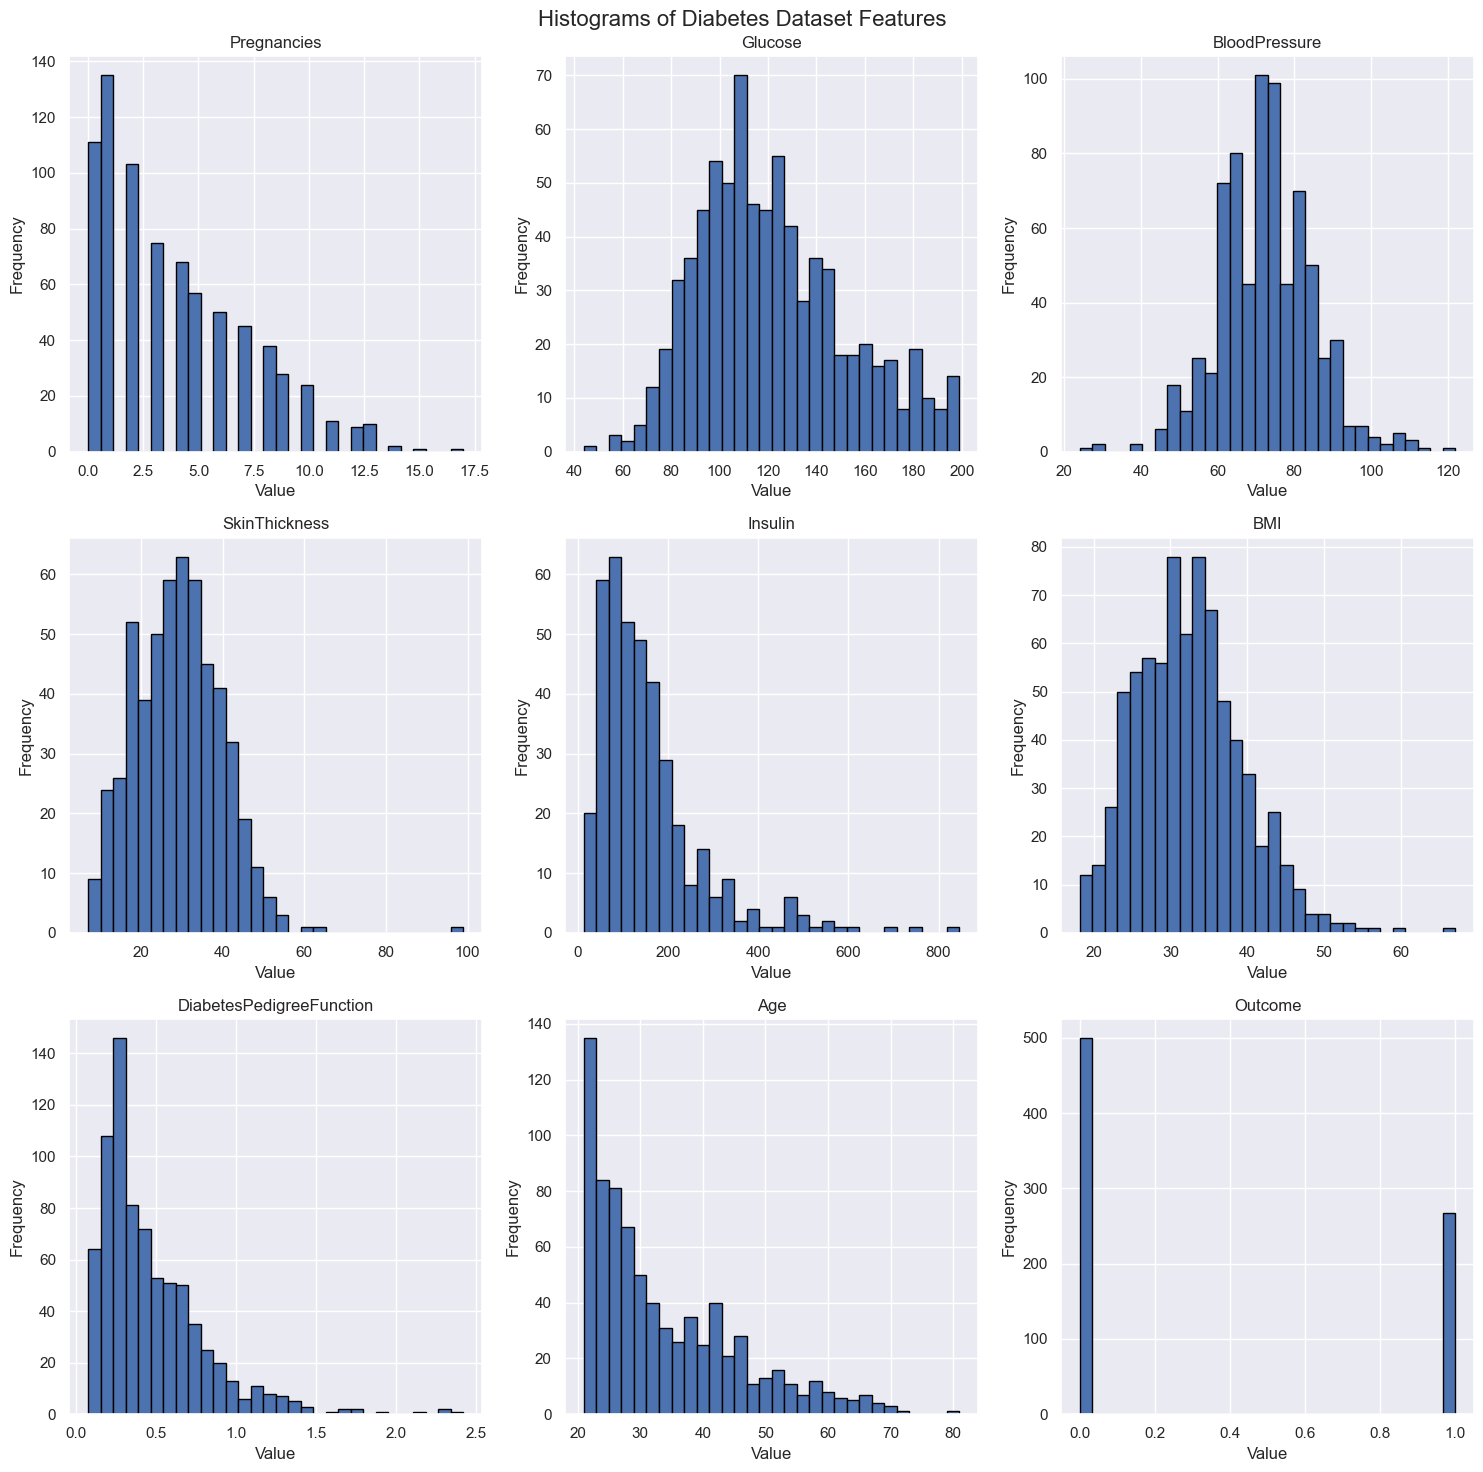

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)

axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [12]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

C:\Users\Katarina\AppData\Local\Temp\ipykernel_4972\2967789988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
C:\Users\Katarina\AppData\Local\Temp\ipykernel_4972\2967789988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

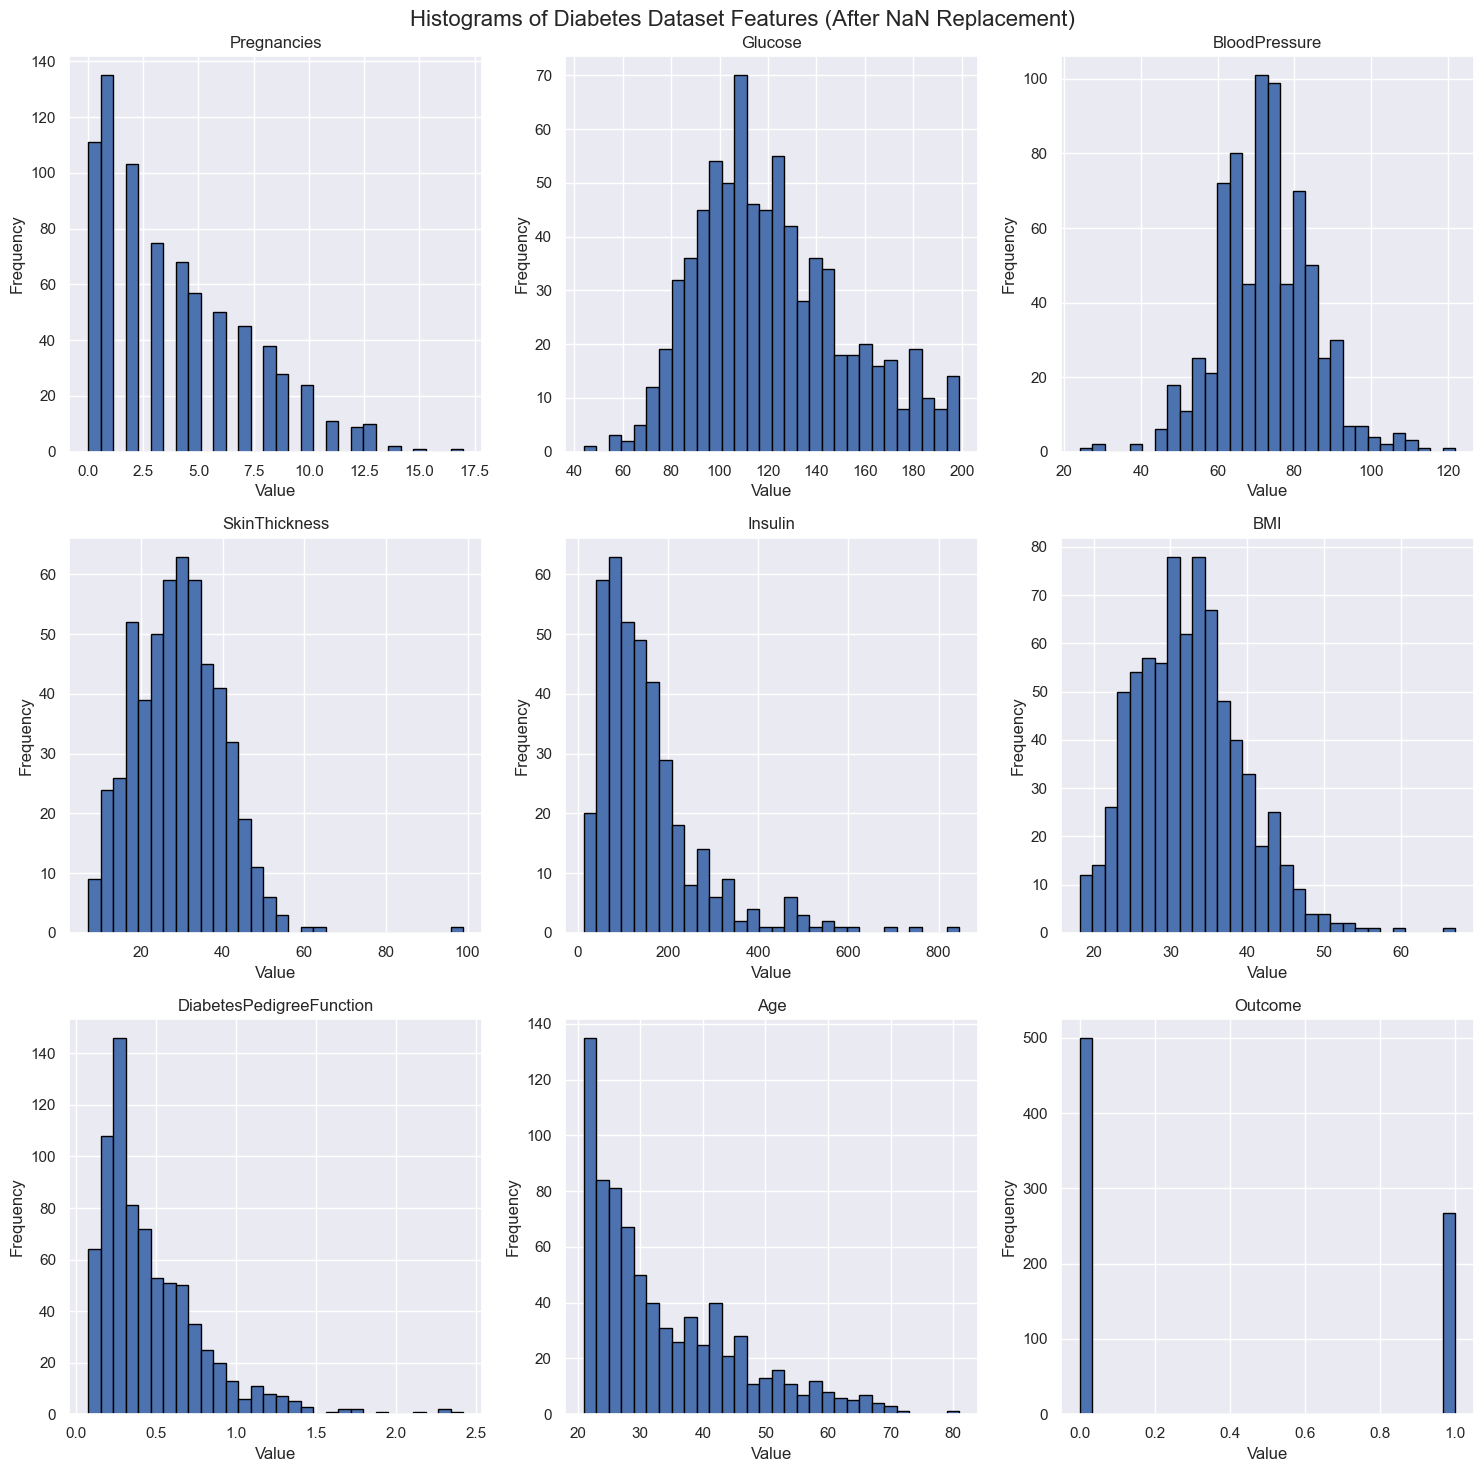

In [14]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    df[column] = df[column].replace(0, np.nan)

# figure with subplots for each column
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Histograms of Diabetes Dataset Features (After NaN Replacement)', fontsize=16)
axes = axes.flatten()
for i, column in enumerate(df.columns):
    axes[i].hist(df[column].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


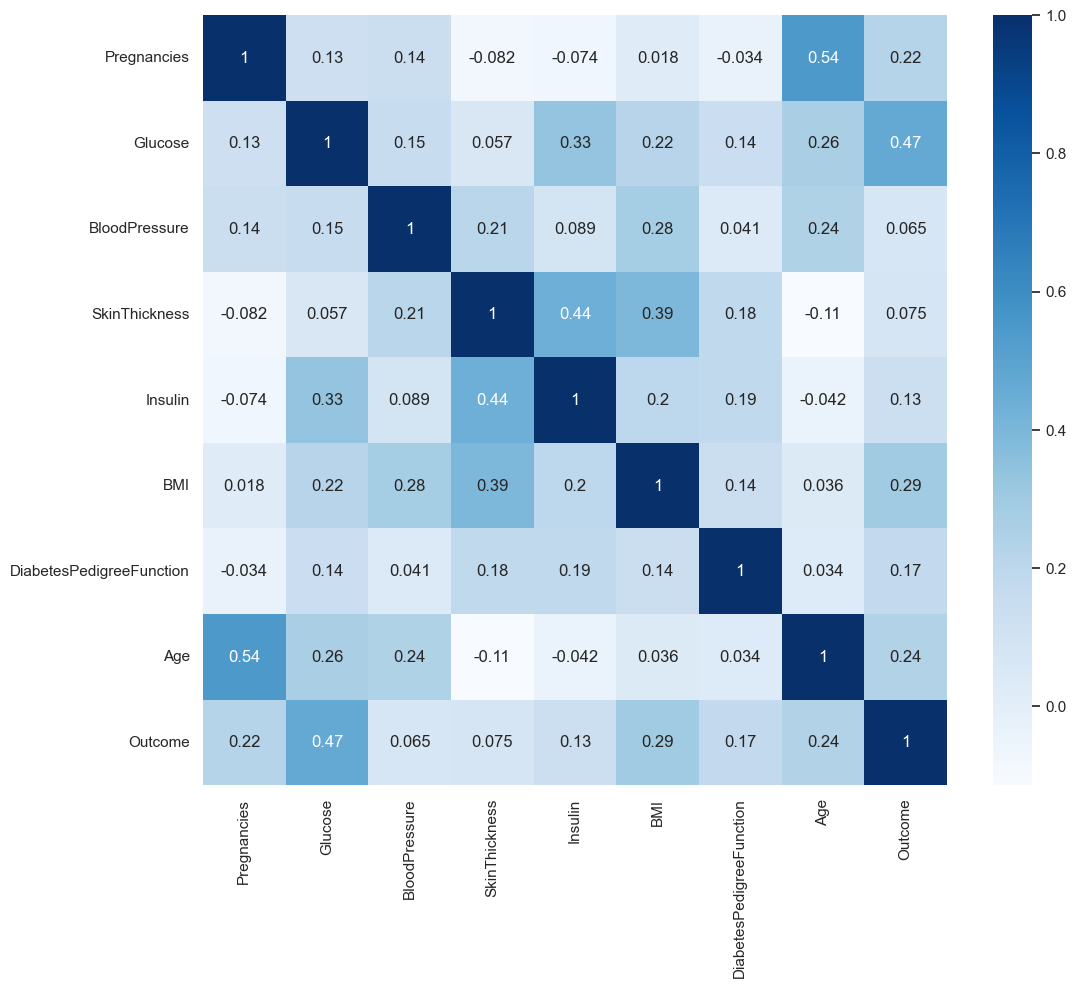

In [15]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [16]:
y = df['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)

# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (537, 8)
Testing set shape: (231, 8)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Scaled training set shape: (537, 8)
Scaled testing set shape: (231, 8)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

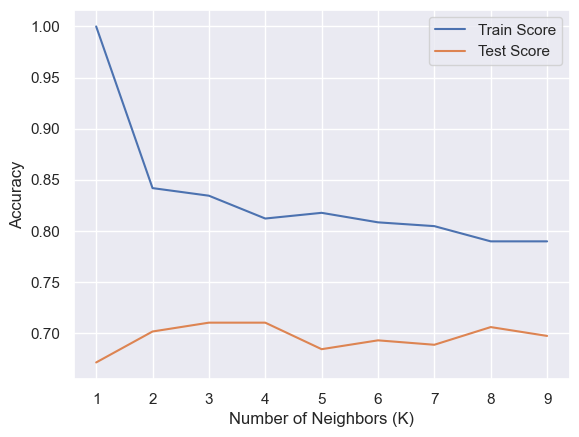

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import numpy as np

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    
    train_scores.append(knn.score(X_train_imputed, y_train))
    test_scores.append(knn.score(X_test_imputed, y_test))

plt.plot(range(1, 10), train_scores, label='Train Score')
plt.plot(range(1, 10), test_scores, label='Test Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [23]:
for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_imputed, y_train)
    
    train_score = knn.score(X_train_imputed, y_train)
    test_score = knn.score(X_test_imputed, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"K = {i}:")
    print(f"  Train Score: {train_score:.4f}")
    print(f"  Test Score: {test_score:.4f}")
    print()

K = 1:
  Train Score: 1.0000
  Test Score: 0.6710

K = 2:
  Train Score: 0.8417
  Test Score: 0.7013

K = 3:
  Train Score: 0.8343
  Test Score: 0.7100

K = 4:
  Train Score: 0.8119
  Test Score: 0.7100

K = 5:
  Train Score: 0.8175
  Test Score: 0.6840

K = 6:
  Train Score: 0.8082
  Test Score: 0.6926

K = 7:
  Train Score: 0.8045
  Test Score: 0.6883

K = 8:
  Train Score: 0.7896
  Test Score: 0.7056

K = 9:
  Train Score: 0.7896
  Test Score: 0.6970



**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [25]:
max_train_score = max(train_scores)
best_k = train_scores.index(max_train_score) + 1
print(f"The number of neighbors that resulted in the maximum training score is: {best_k}")
print(f"The maximum training score is: {max_train_score:.4f}")

The number of neighbors that resulted in the maximum training score is: 1
The maximum training score is: 1.0000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [26]:
max_test_score = max(test_scores)
best_k_test = test_scores.index(max_test_score) + 1
print(f"The number of neighbors that resulted in the maximum testing score is: {best_k_test}")
print(f"The maximum testing score is: {max_test_score:.4f}")

The number of neighbors that resulted in the maximum testing score is: 3
The maximum testing score is: 0.7100


Plot the train and test model performance by number of neighbors.

K = 1:
  Train Score: 1.0000
  Test Score: 0.6580

K = 2:
  Train Score: 0.8529
  Test Score: 0.6926

K = 3:
  Train Score: 0.8641
  Test Score: 0.6797

K = 4:
  Train Score: 0.8454
  Test Score: 0.7143

K = 5:
  Train Score: 0.8454
  Test Score: 0.7056

K = 6:
  Train Score: 0.8156
  Test Score: 0.6883

K = 7:
  Train Score: 0.8361
  Test Score: 0.7056

K = 8:
  Train Score: 0.8194
  Test Score: 0.7273

K = 9:
  Train Score: 0.8156
  Test Score: 0.7143



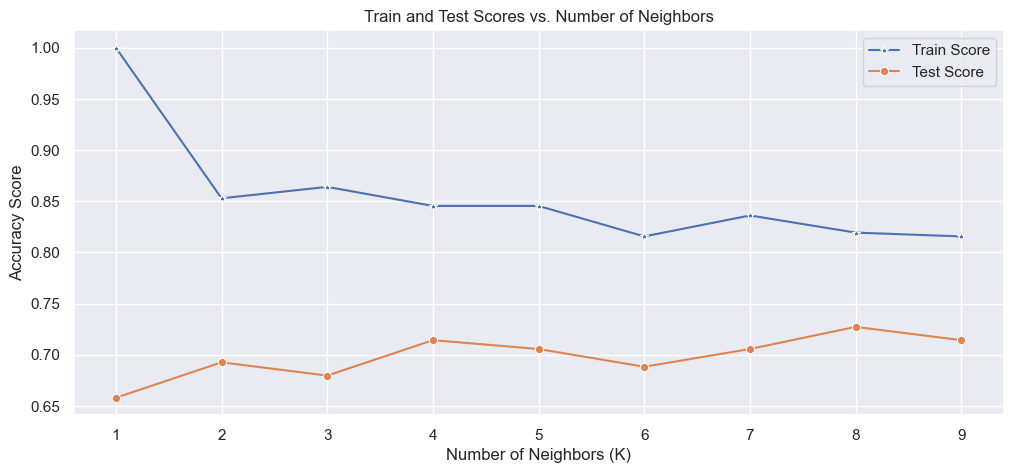

Best K for training set: 1
Best K for testing set: 8


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize lists to store scores
train_scores = []
test_scores = []
k_values = range(1, 10)

# Train and evaluate KNN for different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"K = {k}:")
    print(f"  Train Score: {train_score:.4f}")
    print(f"  Test Score: {test_score:.4f}")
    print()

plt.figure(figsize=(12, 5))
sns.lineplot(x=k_values, y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=k_values, y=test_scores, marker='o', label='Test Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.title('Train and Test Scores vs. Number of Neighbors')
plt.legend()
plt.show()

# best K for train and test scores
best_k_train = k_values[np.argmax(train_scores)]
best_k_test = k_values[np.argmax(test_scores)]
print(f"Best K for training set: {best_k_train}")
print(f"Best K for testing set: {best_k_test}")

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [33]:
best_knn = KNeighborsClassifier(n_neighbors=best_k_test)
best_knn.fit(X_train_scaled, y_train)
train_score = best_knn.score(X_train_scaled, y_train)
test_score = best_knn.score(X_test_scaled, y_test)
print(f"Best KNN model (K={best_k_test}):")
print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

Best KNN model (K=8):
Training Score: 0.8194
Testing Score: 0.7273


In [35]:
from sklearn.metrics import confusion_matrix

y_pred = best_knn.predict(X_test_scaled)

pl = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(pl)

Confusion Matrix:
[[126  25]
 [ 38  42]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

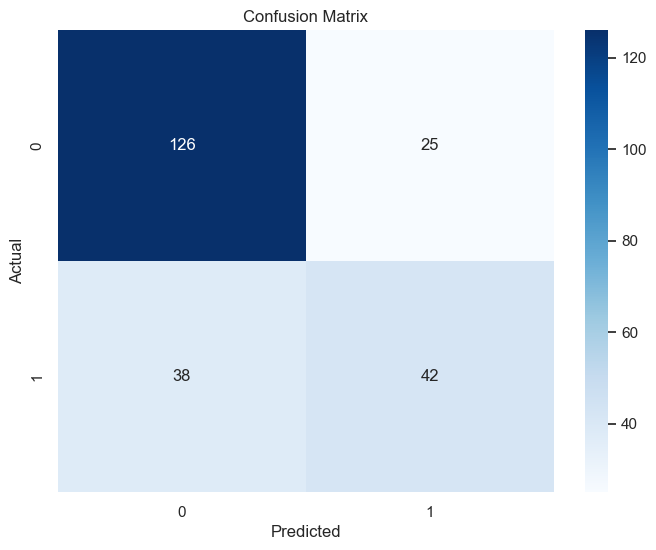

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.63      0.53      0.57        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': np.arange(1, 50)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'knn__n_neighbors': 23}
Best cross-validation score: 0.7695866225277991


#### Print the best score and best parameter for n_neighbors.

In [44]:
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.7695866225277991
Best Parameters: {'knn__n_neighbors': 23}


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [46]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {'rf__n_estimators': np.arange(10, 200, 10)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X, y)
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.7682794329853152
Best Parameters: {'rf__n_estimators': 70}
